# TD1 - MNIST và Bitcoin với Feedforward Network

## 1A. MNIST

### Mô tả

Trong phần này, ta dùng Feedforward Network (FFN) để phân loại các chữ số trong tập dữ liệu nổi tiếng <a href="https://toolbox.google.com/datasetsearch/search?query=MNIST%20Database%20(mnist.pkl.gz)&docid=QZBrQgKepkevjOimAAAAAA%3D%3D">MNIST</a>. Ta sử dụng thư viện `keras` để làm việc với các mô hình FFN.

Để download MNIST với keras, ta sử dụng đoạn code sau:

In [214]:
from keras.datasets import mnist
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

Tại lần chạy đầu tiên của đoạn code, dữ liệu sẽ được download. Ở các lần chạy sau, dữ liệu sẽ được gọi trực tiếp từ ổ đĩa (không cần download lại).

In [215]:
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

`X_train_raw`, `y_train_raw` là dữ liệu dùng cho training với 60000 hình ảnh, mỗi ảnh có kích thước 28x28, tương ứng với nhãn là một chữ số từ 0 đến 9. Tương tự có 10000 hình ảnh dùng cho test (`X_test_raw`, `y_test_raw`).

In [216]:
X_train_raw.shape, y_train_raw.shape, X_test_raw.shape, y_test_raw.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Mỗi hình ảnh có dạng đen trắng, trong đó mỗi pixel có giá trị (cường độ) thuộc đoạn [0, 255], 0 tượng trưng cho đen và 255 tượng trưng cho trắng.

In [217]:
print(X_train_raw[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Trong cả TD này, ta sẽ làm việc với dạng chuẩn hoá của các hình ảnh, trong đó thay cường độ các pixel được chia cho 255 và thuộc đoạn [0, 1]. Đồng thời ta sẽ chuyển mỗi hình ảnh về một vector 784 chiều thay cho một array (28 x 28).

In [218]:
X_train = X_train_raw.reshape((60000, 784))/255
X_test = X_test_raw.reshape((10000, 784))/255
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Ngoài ra, để áp dụng multiclass, classification, ta sẽ biến mỗi nhãn $0, 1, \ldots, 9$ thành các vector 10 thành phần $(t_0, \ldots, t_9)$ trong đó có 1 thành phần duy nhất bằng 1, các thành phần khác bằng 0. 

In [219]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train_raw, 10)
Y_test = np_utils.to_categorical(y_test_raw, 10)

Kiểm tra lại: 

In [220]:
y_train_raw[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [221]:
Y_train[:5] # Các vector này tương ứng với 5 nhãn phía trên

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Bài 1 Multinomial Logistic Regression (Softmax Regression)

Nhắc lại rằng Softmax Regression tương ứng với một FFN với 1 hidden layer, với hàm kích hoạt (activation function) là hàm softmax

và hàm loss được sử dụng là categorical entropy.
$$
L(t, y) = -\sum_{k=1}^K t_k \log(y_k)
$$

($K$ là số lớp trong bài toán phân loại, ở đây là 10).

***Sử dụng `keras`, hãy xây dựng một mô hình (model) theo FFN nêu trên. Lưu mô hình này bằng một tên biến riêng (ví dụ `model1` để so sánh về sau).***

In [222]:
# SOLUTION

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
np.random.seed(0) 

NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 
INPUT_SIZE = 28*28

In [223]:
# SOLUTION

model1 = Sequential()
model1.add(Dense(NB_CLASSES, input_shape=(INPUT_SIZE,)))
model1.add(Activation('softmax'))

Khi gọi `model1.summary()`, số lượng tham số cần bằng 7850, tương ứng với 784 unit ở input layer + 1 unit tự do, nhân với số unit ở output layer. Bạn có thể dùng đoạn code dưới đây để test.

In [224]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 10)                7850      
_________________________________________________________________
activation_183 (Activation)  (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


***Hãy train với Softmax Regression trên `X_train`, `Y_train` bằng cách chọn ngẫu nhiên 80% để train và 20% cho validation, sau đó dự đoán trên `X_test`, `Y_test`. Sử dụng `np.random.seed(0)` để cố định trạng thái ngẫu nhiên và SGD (các tham số ở dạng default) làm thuật toán tối ưu. Chọn minibatch size là 128. Tính accuracy trên tập train và tập validation sau 20 bước lặp. Lưu lịch sử train bằng một tên biến riêng (ví dụ `history1 = model1.fit(...)`) để sử dụng về sau.***

In [225]:
# SOLUTION

model1.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history1 = model1.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 56us/step - loss: 1.3437 - acc: 0.6849 - val_loss: 0.8861 - val_acc: 0.8268
Epoch 2/20
48000/48000 [==============================] - 1s 24us/step - loss: 0.7886 - acc: 0.8273 - val_loss: 0.6561 - val_acc: 0.8581
Epoch 3/20
48000/48000 [==============================] - 1s 24us/step - loss: 0.6422 - acc: 0.8492 - val_loss: 0.5615 - val_acc: 0.8692
Epoch 4/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.5706 - acc: 0.8600 - val_loss: 0.5093 - val_acc: 0.8777
Epoch 5/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.5267 - acc: 0.8673 - val_loss: 0.4753 - val_acc: 0.8813
Epoch 6/20
48000/48000 [==============================] - 1s 20us/step - loss: 0.4965 - acc: 0.8719 - val_loss: 0.4510 - val_acc: 0.8878
Epoch 7/20
48000/48000 [==============================] - 1s 19us/step - loss: 0.4742 - acc: 0.8767 - val_loss: 0.4328 - val_acc

In [226]:
# SOLUTION

model1.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 82us/step


[0.34765567469596864, 0.904]

***Vẽ đồ thị biểu diễn accuracy trên tập train và tập validation theo quá trình train (20 bước)***.

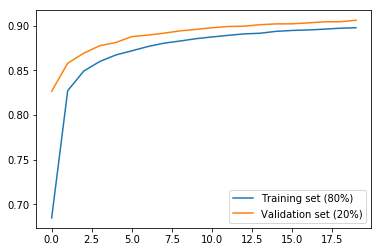

In [227]:
# SOLUTION

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(20), history1.history.get('acc'), label = 'Training set (80%)')
plt.plot(range(20), history1.history.get('val_acc'), label = 'Validation set (20%)')
plt.legend()

### Bài 2. FFN 2 tầng - Chọn Hidden Unit

Ta sử dụng model sau: 

- Tầng input: 784 unit (+1 unit tự do) như cũ
- Tầng hidden trung gian: 8, 32, 128 hoặc 512 unit (4 lựa chọn)
- Hàm kích hoạt ở tầng hidden trung gian: relu hoặc sigmoid (2 lựa chọn)
- Tầng output: 10 unit
- Hàm kích hoạt ở tầng output: softmax

- Hàm loss: categorical entropy

***Sử dụng `keras`, hãy xây dựng 8 mô hình (model) theo mô tả nêu trên. Lưu các mô hình này bằng một tên biến riêng (ví dụ `model2A`, ..., `model2H` để so sánh về sau).***

In [228]:
# SOLUTION

models2 = []
histories2 = [];

NB_HIDDEN_UNITS = [8, 32, 128, 512]
ACTIVATION_FUNCTIONS = ['relu', 'sigmoid']

for nb_hidden_unit in NB_HIDDEN_UNITS:
    for activation_function in ACTIVATION_FUNCTIONS:
        models2.append(Sequential())
        models2[-1].add(Dense(nb_hidden_unit, input_shape=(INPUT_SIZE,)))
        models2[-1].add(Activation(activation_function))
        models2[-1].add(Dense(NB_CLASSES))
        models2[-1].add(Activation('softmax'))

In [229]:
models2[0].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_182 (Dense)            (None, 8)                 6280      
_________________________________________________________________
activation_184 (Activation)  (None, 8)                 0         
_________________________________________________________________
dense_183 (Dense)            (None, 10)                90        
_________________________________________________________________
activation_185 (Activation)  (None, 10)                0         
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [230]:
models2[7].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_196 (Dense)            (None, 512)               401920    
_________________________________________________________________
activation_198 (Activation)  (None, 512)               0         
_________________________________________________________________
dense_197 (Dense)            (None, 10)                5130      
_________________________________________________________________
activation_199 (Activation)  (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


***Hãy train với các mô hình trên `X_train`, `Y_train` bằng cách chọn ngẫu nhiên 80% để train và 20% cho validation, sau đó dự đoán trên `X_test`, `Y_test`. Sử dụng `np.random.seed(0)` để cố định trạng thái ngẫu nhiên và SGD (các tham số ở dạng default) làm thuật toán tối ưu. Chọn batch size là 128. Tính accuracy trên tập train và tập validation sau 20 bước lặp. Lưu lịch sử train bằng một tên biến riêng (ví dụ `history2A = model2A.fit(...)`) để sử dụng về sau.***

In [231]:
# SOLUTION

i = 0
BATCH_SIZE = 128
OPTIMIZER = SGD()

for nb_hidden_unit in NB_HIDDEN_UNITS:
    for activation_function in ACTIVATION_FUNCTIONS:
        np.random.seed(0)
        models2[i].compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
        histories2.append(models2[i].fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=0, validation_split=VALIDATION_SPLIT))
        print("Nb Units: {}, activation: {}. Test result: {}".format(nb_hidden_unit, activation_function, models2[i].evaluate(X_test, Y_test)))
        i += 1

10000/10000 [==============================] - 1s 102us/step
Nb Units: 8, activation: relu. Test result: [0.35850902096033094, 0.8972]
10000/10000 [==============================] - 1s 117us/step
Nb Units: 8, activation: sigmoid. Test result: [0.8136835326194763, 0.8298]
10000/10000 [==============================] - 1s 121us/step
Nb Units: 32, activation: relu. Test result: [0.26319868678450586, 0.9269]
10000/10000 [==============================] - 1s 118us/step
Nb Units: 32, activation: sigmoid. Test result: [0.47016625819206237, 0.8905]
10000/10000 [==============================] - 1s 52us/step
Nb Units: 128, activation: relu. Test result: [0.23383381830751895, 0.9352]
10000/10000 [==============================] - 1s 123us/step
Nb Units: 128, activation: sigmoid. Test result: [0.40238749358654025, 0.8945]
10000/10000 [==============================] - ETA:  - 1s 78us/step
Nb Units: 512, activation: relu. Test result: [0.22236659649610518, 0.9397]
10000/10000 [====================

***Vẽ đồ thị biểu diễn accuracy trên tập train theo quá trình train (20 bước) với từng mô hình trên. Chọn ra cặp tham số tốt nhất cho số unit ở tầng hidden và hàm activation được sử dụng. Biểu diễn số liệu ở dạng DataFrame để so sánh.***.

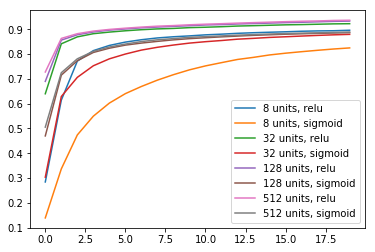

In [232]:
# SOLUTION

i = 0

for nb_hidden_unit in NB_HIDDEN_UNITS:
    for activation_function in ACTIVATION_FUNCTIONS:
        plt.plot(range(NB_EPOCH), histories2[i].history.get('acc'), label='{} units, {}'.format(nb_hidden_unit, activation_function))
        i += 1
    
plt.legend()

In [233]:
# SOLUTION

import pandas as pd
pd.DataFrame([h.history.get('acc') for h in histories2])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.284375,0.614229,0.771563,0.813792,0.834729,0.848208,0.857750,0.864958,0.869687,0.873208,0.877417,0.880167,0.883563,0.885979,0.887958,0.889750,0.891917,0.893292,0.893979,0.895958
1,0.139458,0.337021,0.474000,0.549646,0.602354,0.640479,0.669312,0.694896,0.716833,0.736333,0.752229,0.765354,0.778188,0.786667,0.796375,0.803479,0.809521,0.815146,0.820354,0.824729
2,0.639875,0.841292,0.869250,0.882062,0.888521,0.893813,0.898125,0.901354,0.903292,0.906479,0.908104,0.910208,0.912875,0.914375,0.916042,0.917792,0.918750,0.920167,0.921687,0.922354
3,0.303583,0.628833,0.706125,0.752771,0.780729,0.800042,0.815958,0.827271,0.836333,0.844125,0.849833,0.854542,0.859958,0.863292,0.867042,0.869708,0.872521,0.875146,0.877479,0.879354
4,0.689833,0.856146,0.877771,0.888896,0.896396,0.901083,0.905625,0.908771,0.911625,0.914188,0.917250,0.918687,0.921167,0.922958,0.924708,0.926646,0.928042,0.929854,0.931688,0.932771
5,0.469979,0.715000,0.773167,0.806438,0.823604,0.836021,0.844229,0.851104,0.857292,0.862083,0.865812,0.869292,0.872437,0.875458,0.877708,0.880000,0.881729,0.883354,0.884833,0.886292
6,0.727583,0.863021,0.882062,0.892563,0.899250,0.904271,0.908667,0.912375,0.914771,0.917937,0.920375,0.922375,0.924625,0.926667,0.928500,0.930583,0.932187,0.933458,0.935375,0.936271
7,0.505458,0.724688,0.780792,0.810854,0.828271,0.840208,0.850292,0.857396,0.862229,0.867313,0.870167,0.873042,0.876062,0.878354,0.880646,0.882604,0.884250,0.885500,0.887250,0.888646


### Bài 3. FFN 2 tầng. Chọn thuật toán tối ưu

Sau bài 2, ta chọn activation là **`relu`** và số unit là **128**. Bây giờ ta chọn thuật toán tối ưu trong số list sau:

- `SGD (lr = 0.1)`

***Hãy train với các mô hình trên `X_train`, `Y_train` bằng cách chọn ngẫu nhiên 80% để train và 20% cho validation, sau đó dự đoán trên `X_test`, `Y_test`. Sử dụng `np.random.seed(0)` để cố định trạng thái ngẫu nhiên , chọn batch size là 128. Tính accuracy trên tập train và tập validation sau 20 bước lặp.***


In [234]:
# SOLUTION

from keras.optimizers import Adam
models3 = []
histories3 = []

NB_HIDDEN_UNIT = 128
ACTIVATION_FUNCTION = 'relu'
OPTIMIZERS = [SGD(lr = 0.01), SGD(lr = 0.1), SGD(lr = 0.1, momentum = 0.9), Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999), Adam(lr = 0.01, beta_1 = 0.9, beta_2 = 0.999)]

i = 0

for optimizer in OPTIMIZERS:
    np.random.seed(0)
    models3.append(Sequential())
    models3[-1].add(Dense(NB_HIDDEN_UNIT, input_shape=(INPUT_SIZE,)))
    models3[-1].add(Activation(ACTIVATION_FUNCTION))
    models3[-1].add(Dense(NB_CLASSES))
    models3[-1].add(Activation('softmax'))
    models3[-1].compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    histories3.append(models3[i].fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=1, validation_split=VALIDATION_SPLIT))
    print("Algo {}: {}".format(i, models3[-1].evaluate(X_test, Y_test)))
    i += 1

    

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 164us/step - loss: 1.2746 - acc: 0.6952 - val_loss: 0.7083 - val_acc: 0.8508
Epoch 2/20
48000/48000 [==============================] - 3s 53us/step - loss: 0.6107 - acc: 0.8569 - val_loss: 0.4894 - val_acc: 0.8796
Epoch 3/20
48000/48000 [==============================] - 3s 54us/step - loss: 0.4792 - acc: 0.8772 - val_loss: 0.4145 - val_acc: 0.8933
Epoch 4/20
48000/48000 [==============================] - 3s 55us/step - loss: 0.4220 - acc: 0.8875 - val_loss: 0.3762 - val_acc: 0.8978
Epoch 5/20
48000/48000 [==============================] - 3s 64us/step - loss: 0.3883 - acc: 0.8948 - val_loss: 0.3519 - val_acc: 0.9040
Epoch 6/20
48000/48000 [==============================] - 4s 91us/step - loss: 0.3655 - acc: 0.9002 - val_loss: 0.3346 - val_acc: 0.9075
Epoch 7/20
48000/48000 [==============================] - 5s 108us/step - loss: 0.3483 - acc: 0.9040 - val_loss: 0.3211 - val_a

***Vẽ đồ thị biểu diễn accuracy trên tập train theo quá trình train (20 bước) với từng mô hình trên. Chọn ra thuật toán (cùng với các tham số tốt nhất) được sử dụng. Biểu diễn các giá trị ở dạng DataFrame để có so sánh cụ thể hơn. Bạn có thể thử với các thuật toán tối ưu khác.***.

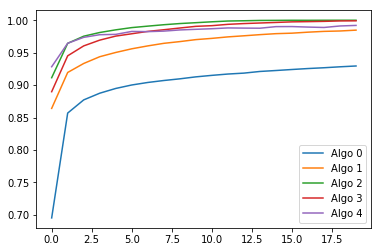

In [235]:
# SOLUTION

for i in range(len(OPTIMIZERS)):
    plt.plot(range(NB_EPOCH), histories3[i].history.get('acc'), label='Algo {}'.format(i))
    
plt.legend()

In [236]:
import pandas as pd
pd.DataFrame([h.history.get('acc') for h in histories3])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.695167,0.856854,0.877167,0.887479,0.894813,0.900167,0.904042,0.907062,0.909646,0.912687,0.915000,0.917042,0.918458,0.921021,0.922479,0.924042,0.925521,0.926750,0.928208,0.929458
1,0.864062,0.919458,0.933333,0.943750,0.950313,0.955958,0.960438,0.964396,0.967063,0.970125,0.972042,0.974333,0.976021,0.977792,0.979313,0.980062,0.981604,0.982833,0.983437,0.984729
2,0.911375,0.964396,0.975396,0.981104,0.985208,0.988646,0.990917,0.993083,0.994896,0.996229,0.997604,0.998792,0.999208,0.999708,0.999812,0.999958,0.999917,0.999979,1.000000,1.000000
3,0.889792,0.945146,0.960438,0.969333,0.975562,0.979146,0.982792,0.985354,0.988021,0.990604,0.991625,0.993687,0.994875,0.995750,0.996604,0.997500,0.997854,0.998271,0.998917,0.999104
4,0.928292,0.964500,0.973625,0.977708,0.978208,0.982729,0.982437,0.983229,0.985042,0.986021,0.986917,0.988146,0.987875,0.987708,0.990146,0.990250,0.989458,0.988854,0.991167,0.992021


### Bài 4. Regularization

## 1B. Bitcoin

### Mô tả

Ở TD6 DSC101, ta đã dự đoán độ biến thiên giá Bitcoin sau 1 tuần thông qua Linear và Polynomial Regression trên một số chỉ số tài chính dễ tính. Ta sử dụng file giá bitcoin tại <a href="https://raw.githubusercontent.com/riduan91/DSC111/master/Lesson1/TD/Data/BTCPrice.csv">`Data.csv`</a>. Nhắc lại rằng ở TD6 DSC101 ta đã viết các hàm sau:

In [237]:
import stockstats as sts
from sklearn.preprocessing import StandardScaler

SHIFT_NUMBER = 7
SKIP = 10
COLUMNS = ['open', 'high', 'low', 'close', 'volume', 'cr', 'cr-ma1', 'cr-ma2', 'cr-ma3', 
           'rsv_9', 'kdjk_9', 'kdjj_9', 'macd', 'macds', 'macdh', 'rs_6', 'rsi_6', 'rs_12', 
           'rsi_12', 'wr_6', 'wr_10', 'cci', 'cci_20', 'tr', 'atr', 'dma', 'high_delta', 'um', 
           'low_delta', 'dm', 'pdm', 'pdm_14', 'pdi_14', 'mdm_14', 'mdi_14', 'dx_14', 
           'adx', 'adxr', 'trix', 'change', 'vr', 'vr_6_sma']

def addTechnicalIndicators(simple_data):
    stock = sts.StockDataFrame(simple_data)
    stock['cr']
    stock['kdjk']
    stock['kdjd']
    stock['kdjj']
    stock['close_10_sma']
    stock['macd']
    stock['boll']
    stock['rsi_6']
    stock['rsi_12']
    stock['wr_6']
    stock['wr_10']
    stock['cci']
    stock['cci_20']
    stock['tr']
    stock['atr']
    stock['dma']
    stock['adxr']
    stock['close_12_ema']
    stock['trix']
    stock['trix_9_sma']
    stock['vr']
    stock['vr_6_sma']
    new_dataframe = pd.DataFrame(stock).loc[:, COLUMNS]
    transformed_dataframe = new_dataframe.iloc[SKIP: len(new_dataframe) - SHIFT_NUMBER] # Bỏ các hàng khuyết dữ liệu
    scaler = StandardScaler()
    scaler.fit(transformed_dataframe)
    return pd.DataFrame(scaler.transform(transformed_dataframe), columns=COLUMNS)

def readAsStockDataFrame(filename):
    data = pd.read_csv(filename, sep=",", names=["timestamp", "open", "high", "low", "close", "volume", "volume currency", "weighted price"], skiprows = 1)
    data = data.loc[:, ["timestamp", "open", "high", "low", "close", "volume"]]
    return addTechnicalIndicators(data)

def getPriceDiff(data, shift_number):
    return np.concatenate((data.loc[:, "Close"].values[shift_number:] * 100 / data.loc[:, "Close"].values[: len(data) - shift_number] - 100, [0] * shift_number))

Như vậy, khi chạy đoạn code sau, ta được dữ liệu là các chỉ số tài chính tương ứng với các ngày giao dịch của Bitcoin.

In [238]:
DATAFILE = "Data/BTCPrice.csv"
X = readAsStockDataFrame(DATAFILE)

D:\Users\ndoannguyen\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\Users\ndoannguyen\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\stockstats.py:387: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  lambda x: np.fabs(x - x.mean()).mean())


In [239]:
X.head(10)

,open,high,low,close,volume,cr,cr-ma1,cr-ma2,cr-ma3,rsv_9,...,pdi_14,mdm_14,mdi_14,dx_14,adx,adxr,trix,change,vr,vr_6_sma
0,-0.557662,-0.555577,-0.567160,-0.558149,-0.684977,0.254511,-0.054549,2.535630,9.440731,-0.223739,...,0.512639,-0.389301,-0.390922,-0.017700,0.761042,1.047989,-0.435186,-0.146963,-0.961677,-0.787207
1,-0.557872,-0.555192,-0.568139,-0.558405,-0.154990,0.013675,0.406567,1.990468,6.653909,-0.299411,...,0.109721,-0.386393,-0.291621,-0.491732,0.349655,0.856236,-0.416393,-0.189552,-1.131634,-0.838256
2,-0.557937,-0.556164,-0.569415,-0.562664,-0.298147,-0.298446,0.591809,1.894016,4.221087,-1.745237,...,-0.216358,-0.381915,-0.136020,-1.063830,-0.155752,0.554994,-0.428084,-0.902234,-1.235631,-0.847340
3,-0.562264,-0.559159,-0.572859,-0.563380,0.127178,-0.620990,0.687280,1.880327,3.147333,-1.804377,...,-0.477820,-0.363203,0.573056,-0.839978,-0.428006,0.253150,-0.457949,-0.275354,-1.344351,-1.097693
4,-0.562965,-0.560509,-0.571985,-0.564381,-0.638554,-0.664228,0.828384,1.773829,2.466648,-2.103575,...,-0.617778,-0.371092,0.349826,-0.839978,-0.620778,-0.023577,-0.499683,-0.328561,-1.381465,-1.223595
5,-0.563976,-0.561813,-0.595409,-0.586909,3.824167,-1.288034,0.511783,1.623167,1.930341,-2.592556,...,-1.126243,-0.221296,3.730147,1.360778,0.066295,0.003966,-0.640604,-4.326138,-1.567069,-1.352342
6,-0.586539,-0.573525,-0.598206,-0.578192,2.155016,-1.342460,0.037690,0.660938,1.835456,-1.381047,...,-1.280835,-0.231281,2.899891,1.440978,0.584858,0.192286,-0.787193,1.786625,-1.259720,-1.405244
7,-0.577642,-0.573813,-0.589815,-0.580379,-0.096608,-1.233583,-0.280532,0.230979,1.821989,-1.509907,...,-1.339793,-0.257860,2.363016,1.440978,0.954091,0.446360,-0.933997,-0.594695,-1.307641,-1.436485
8,-0.580215,-0.574633,-0.590644,-0.578652,-0.286669,-1.223358,-0.604645,0.224193,1.717222,-1.267710,...,-1.391286,-0.275034,2.026806,1.468815,1.227612,0.716232,-1.062485,0.218046,-1.228005,-1.435132
9,-0.578405,-0.575123,-0.589959,-0.581480,-0.258532,-1.218921,-0.889590,0.154650,1.569007,-1.613064,...,-1.430845,-0.294892,1.652392,1.468815,1.422671,0.971971,-1.181011,-0.729020,-1.268552,-1.421677


In [240]:
y_raw = getPriceDiff(pd.read_csv(DATAFILE, sep=","), SHIFT_NUMBER)
y = y_raw[SKIP: len(y_raw) - 7]
len(y)

715

### Bài 1. Polynomial Regression

***Thực hiện lại việc train với Polynomial Regression với regularization l1, hệ số phạt `alpha` = 0.1, với `random_state = 0` khi dùng `train_test_split` và dùng 50% dữ liệu để validation. Tính RSE (bình phương của RMSE).*** 

In [243]:
# SOLUTION

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

poly = PolynomialFeatures(2)
X_train_transformed = poly.fit_transform(X_train)
X_test_transformed = poly.fit_transform(X_test)
model = Lasso(fit_intercept = False, max_iter = 100000, alpha = alpha)
model.fit(X_train_transformed, y_train)
y_predict = model.predict(X_test_transformed)
y_predict_train = model.predict(X_train_transformed)
print("Nb_iterations used: ", model.n_iter_)
print("TrainMSE: ", mean_squared_error(y_train, y_predict_train))
print("ValidationMSE: ", mean_squared_error(y_test, y_predict))

Nb_iterations used:  15170
TrainMSE:  29.994188126537928
ValidationMSE:  87.41474630003407


***Giảm size của tập validation còn 20% và tính lại RSE trên các tập train, validation.*** 

In [244]:
# SOLUTION

alpha = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

poly = PolynomialFeatures(2)
X_train_transformed = poly.fit_transform(X_train)
X_test_transformed = poly.fit_transform(X_test)
model = Lasso(fit_intercept = False, max_iter = 100000, alpha = alpha)
model.fit(X_train_transformed, y_train)
y_predict = model.predict(X_test_transformed)
y_predict_train = model.predict(X_train_transformed)
print("Nb_iterations used: ", model.n_iter_)
print("TrainMSE: ", mean_squared_error(y_train, y_predict_train))
print("ValidationMSE: ", mean_squared_error(y_test, y_predict))

Nb_iterations used:  17747
TrainMSE:  39.21048873914117
ValidationMSE:  59.856822857924


Nhận xét: Bài toán của ta gặp phải vấn đề thiếu dữ liệu trong khi thuật toán sử dụng phức tạp. Overfitting giảm khi số lượng dữ liệu dùng cho huấn luyện tăng lên. 

### Bài 2. FFN 2 tầng

In [275]:
from keras import regularizers
NB_EPOCH = 1000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X.shape[1])

np.random.seed(0)
bit_model = Sequential()
bit_model.add(Dense(64, input_shape=(X.shape[1],)))
bit_model.add(Activation('tanh'))
bit_model.add(Dense(1))
bit_model.add(Activation('linear'))
bit_model.compile(loss='mean_squared_error', optimizer=SGD(lr = 0.01))
bit_history = bit_model.fit(X_train, y_train, batch_size=1000, epochs=NB_EPOCH, verbose=1, validation_split=0)

42
Epoch 1/1000
572/572 [==============================] - 3s 6ms/step - loss: 140.0365
Epoch 2/1000
572/572 [==============================] - 0s 9us/step - loss: 137.4004
Epoch 3/1000
572/572 [==============================] - 0s 7us/step - loss: 135.0456
Epoch 4/1000
572/572 [==============================] - 0s 9us/step - loss: 132.8879
Epoch 5/1000
572/572 [==============================] - 0s 9us/step - loss: 130.8707
Epoch 6/1000
572/572 [==============================] - 0s 19us/step - loss: 128.9566
Epoch 7/1000
572/572 [==============================] - 0s 7us/step - loss: 127.0942
Epoch 8/1000
572/572 [==============================] - 0s 21us/step - loss: 125.3209
Epoch 9/1000
572/572 [==============================] - 0s 9us/step - loss: 123.5996
Epoch 10/1000
572/572 [==============================] - 0s 7us/step - loss: 121.9257
Epoch 11/1000
572/572 [==============================] - 0s 9us/step - loss: 120.3003
Epoch 12/1000
572/572 [==============================] - 0

Epoch 97/1000
572/572 [==============================] - 0s 5us/step - loss: 75.2303
Epoch 98/1000
572/572 [==============================] - 0s 9us/step - loss: 74.8950
Epoch 99/1000
572/572 [==============================] - 0s 16us/step - loss: 74.5612
Epoch 100/1000
572/572 [==============================] - 0s 10us/step - loss: 74.2289
Epoch 101/1000
572/572 [==============================] - 0s 9us/step - loss: 73.8982
Epoch 102/1000
572/572 [==============================] - 0s 9us/step - loss: 73.5694
Epoch 103/1000
572/572 [==============================] - 0s 7us/step - loss: 73.2432
Epoch 104/1000
572/572 [==============================] - 0s 9us/step - loss: 72.9216
Epoch 105/1000
572/572 [==============================] - 0s 7us/step - loss: 72.6095
Epoch 106/1000
572/572 [==============================] - 0s 16us/step - loss: 72.3183
Epoch 107/1000
572/572 [==============================] - 0s 9us/step - loss: 72.0827
Epoch 108/1000
572/572 [==============================

Epoch 193/1000
572/572 [==============================] - 0s 7us/step - loss: 57.5685
Epoch 194/1000
572/572 [==============================] - 0s 7us/step - loss: 56.3675
Epoch 195/1000
572/572 [==============================] - 0s 5us/step - loss: 57.0556
Epoch 196/1000
572/572 [==============================] - 0s 5us/step - loss: 55.8810
Epoch 197/1000
572/572 [==============================] - 0s 7us/step - loss: 56.5499
Epoch 198/1000
572/572 [==============================] - 0s 9us/step - loss: 55.4059
Epoch 199/1000
572/572 [==============================] - 0s 9us/step - loss: 56.0639
Epoch 200/1000
572/572 [==============================] - 0s 7us/step - loss: 54.9511
Epoch 201/1000
572/572 [==============================] - 0s 5us/step - loss: 55.6055
Epoch 202/1000
572/572 [==============================] - 0s 7us/step - loss: 54.5212
Epoch 203/1000
572/572 [==============================] - 0s 7us/step - loss: 55.1772
Epoch 204/1000
572/572 [==============================

Epoch 289/1000
572/572 [==============================] - 0s 7us/step - loss: 40.5017
Epoch 290/1000
572/572 [==============================] - 0s 5us/step - loss: 39.8565
Epoch 291/1000
572/572 [==============================] - 0s 7us/step - loss: 40.1887
Epoch 292/1000
572/572 [==============================] - 0s 9us/step - loss: 39.5474
Epoch 293/1000
572/572 [==============================] - 0s 10us/step - loss: 39.8574
Epoch 294/1000
572/572 [==============================] - 0s 9us/step - loss: 39.2261
Epoch 295/1000
572/572 [==============================] - 0s 9us/step - loss: 39.5188
Epoch 296/1000
572/572 [==============================] - 0s 7us/step - loss: 38.9033
Epoch 297/1000
572/572 [==============================] - 0s 5us/step - loss: 39.1844
Epoch 298/1000
572/572 [==============================] - 0s 9us/step - loss: 38.5892
Epoch 299/1000
572/572 [==============================] - 0s 9us/step - loss: 38.8650
Epoch 300/1000
572/572 [=============================

Epoch 385/1000
572/572 [==============================] - 0s 7us/step - loss: 29.7063
Epoch 386/1000
572/572 [==============================] - 0s 7us/step - loss: 29.3433
Epoch 387/1000
572/572 [==============================] - 0s 5us/step - loss: 29.5281
Epoch 388/1000
572/572 [==============================] - 0s 9us/step - loss: 29.1628
Epoch 389/1000
572/572 [==============================] - 0s 7us/step - loss: 29.3415
Epoch 390/1000
572/572 [==============================] - 0s 12us/step - loss: 28.9750
Epoch 391/1000
572/572 [==============================] - 0s 7us/step - loss: 29.1474
Epoch 392/1000
572/572 [==============================] - 0s 5us/step - loss: 28.7811
Epoch 393/1000
572/572 [==============================] - 0s 7us/step - loss: 28.9476
Epoch 394/1000
572/572 [==============================] - 0s 9us/step - loss: 28.5832
Epoch 395/1000
572/572 [==============================] - 0s 9us/step - loss: 28.7449
Epoch 396/1000
572/572 [=============================

Epoch 481/1000
572/572 [==============================] - 0s 9us/step - loss: 22.4737
Epoch 482/1000
572/572 [==============================] - 0s 9us/step - loss: 22.2318
Epoch 483/1000
572/572 [==============================] - 0s 9us/step - loss: 22.3426
Epoch 484/1000
572/572 [==============================] - 0s 7us/step - loss: 22.1038
Epoch 485/1000
572/572 [==============================] - 0s 5us/step - loss: 22.2142
Epoch 486/1000
572/572 [==============================] - 0s 12us/step - loss: 21.9786
Epoch 487/1000
572/572 [==============================] - 0s 7us/step - loss: 22.0888
Epoch 488/1000
572/572 [==============================] - 0s 5us/step - loss: 21.8565
Epoch 489/1000
572/572 [==============================] - 0s 5us/step - loss: 21.9666
Epoch 490/1000
572/572 [==============================] - 0s 9us/step - loss: 21.7374
Epoch 491/1000
572/572 [==============================] - 0s 7us/step - loss: 21.8476
Epoch 492/1000
572/572 [=============================

Epoch 577/1000
572/572 [==============================] - 0s 7us/step - loss: 17.3762
Epoch 578/1000
572/572 [==============================] - 0s 5us/step - loss: 17.2172
Epoch 579/1000
572/572 [==============================] - 0s 9us/step - loss: 17.2867
Epoch 580/1000
572/572 [==============================] - 0s 12us/step - loss: 17.1295
Epoch 581/1000
572/572 [==============================] - 0s 7us/step - loss: 17.1989
Epoch 582/1000
572/572 [==============================] - 0s 9us/step - loss: 17.0435
Epoch 583/1000
572/572 [==============================] - 0s 5us/step - loss: 17.1127
Epoch 584/1000
572/572 [==============================] - 0s 7us/step - loss: 16.9589
Epoch 585/1000
572/572 [==============================] - 0s 7us/step - loss: 17.0279
Epoch 586/1000
572/572 [==============================] - 0s 5us/step - loss: 16.8758
Epoch 587/1000
572/572 [==============================] - 0s 9us/step - loss: 16.9445
Epoch 588/1000
572/572 [=============================

Epoch 673/1000
572/572 [==============================] - 0s 7us/step - loss: 13.8197
Epoch 674/1000
572/572 [==============================] - 0s 9us/step - loss: 13.7124
Epoch 675/1000
572/572 [==============================] - 0s 9us/step - loss: 13.7534
Epoch 676/1000
572/572 [==============================] - 0s 10us/step - loss: 13.6463
Epoch 677/1000
572/572 [==============================] - 0s 10us/step - loss: 13.6864
Epoch 678/1000
572/572 [==============================] - 0s 9us/step - loss: 13.5793
Epoch 679/1000
572/572 [==============================] - 0s 9us/step - loss: 13.6185
Epoch 680/1000
572/572 [==============================] - 0s 10us/step - loss: 13.5112
Epoch 681/1000
572/572 [==============================] - 0s 7us/step - loss: 13.5492
Epoch 682/1000
572/572 [==============================] - 0s 9us/step - loss: 13.4417
Epoch 683/1000
572/572 [==============================] - 0s 9us/step - loss: 13.4784
Epoch 684/1000
572/572 [===========================

Epoch 769/1000
572/572 [==============================] - 0s 7us/step - loss: 11.0788
Epoch 770/1000
572/572 [==============================] - 0s 9us/step - loss: 11.0262
Epoch 771/1000
572/572 [==============================] - 0s 7us/step - loss: 11.0335
Epoch 772/1000
572/572 [==============================] - 0s 7us/step - loss: 10.9807
Epoch 773/1000
572/572 [==============================] - 0s 7us/step - loss: 10.9867
Epoch 774/1000
572/572 [==============================] - 0s 7us/step - loss: 10.9337
Epoch 775/1000
572/572 [==============================] - 0s 5us/step - loss: 10.9384
Epoch 776/1000
572/572 [==============================] - 0s 5us/step - loss: 10.8855
Epoch 777/1000
572/572 [==============================] - 0s 7us/step - loss: 10.8893
Epoch 778/1000
572/572 [==============================] - 0s 7us/step - loss: 10.8374
Epoch 779/1000
572/572 [==============================] - 0s 9us/step - loss: 10.8410
Epoch 780/1000
572/572 [==============================

Epoch 865/1000
572/572 [==============================] - 0s 5us/step - loss: 9.0865
Epoch 866/1000
572/572 [==============================] - 0s 7us/step - loss: 9.0556
Epoch 867/1000
572/572 [==============================] - 0s 7us/step - loss: 9.0503
Epoch 868/1000
572/572 [==============================] - 0s 9us/step - loss: 9.0194
Epoch 869/1000
572/572 [==============================] - 0s 9us/step - loss: 9.0135
Epoch 870/1000
572/572 [==============================] - 0s 7us/step - loss: 8.9825
Epoch 871/1000
572/572 [==============================] - 0s 5us/step - loss: 8.9761
Epoch 872/1000
572/572 [==============================] - 0s 5us/step - loss: 8.9451
Epoch 873/1000
572/572 [==============================] - 0s 5us/step - loss: 8.9382
Epoch 874/1000
572/572 [==============================] - 0s 5us/step - loss: 8.9073
Epoch 875/1000
572/572 [==============================] - 0s 7us/step - loss: 8.8999
Epoch 876/1000
572/572 [==============================] - 0s 9us/

Epoch 962/1000
572/572 [==============================] - 0s 5us/step - loss: 7.5723
Epoch 963/1000
572/572 [==============================] - 0s 7us/step - loss: 7.5615
Epoch 964/1000
572/572 [==============================] - 0s 5us/step - loss: 7.5407
Epoch 965/1000
572/572 [==============================] - 0s 7us/step - loss: 7.5304
Epoch 966/1000
572/572 [==============================] - 0s 7us/step - loss: 7.5102
Epoch 967/1000
572/572 [==============================] - 0s 5us/step - loss: 7.5003
Epoch 968/1000
572/572 [==============================] - 0s 9us/step - loss: 7.4808
Epoch 969/1000
572/572 [==============================] - 0s 12us/step - loss: 7.4714
Epoch 970/1000
572/572 [==============================] - 0s 10us/step - loss: 7.4524
Epoch 971/1000
572/572 [==============================] - 0s 7us/step - loss: 7.4434
Epoch 972/1000
572/572 [==============================] - 0s 7us/step - loss: 7.4250
Epoch 973/1000
572/572 [==============================] - 0s 5u

In [276]:
bit_model.evaluate(X_test, y_test)

143/143 [==============================] - 1s 8ms/step


40.75924146425474

## References

[1] <a href="https://toolbox.google.com/datasetsearch/search?query=MNIST%20Database%20(mnist.pkl.gz)&docid=QZBrQgKepkevjOimAAAAAA%3D%3D">MNIST data set</a>

[2] *Antonio Gulli*, Deep Learning with Keras

[3] <a href="https://keras.io">Keras Documentation</a>